Model Selection and Boosting 
Case Study -3 (CS 45)

Case Study


Questions:


1.The data file contains numerical attributes that describe a letter and its corresponding class. Read the datafile “letterCG.bin” and set all the numerical attributes as features. Split the data in to train and test sets.


In [1]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
os.chdir('D:\\top mentor assignment\\Batch 98 Day 57\\ML Case Studies with Answer\\CS 45 Ans - Model Selection and Boosting-3\\')

In [3]:
os.getcwd()

'D:\\top mentor assignment\\Batch 98 Day 57\\ML Case Studies with Answer\\CS 45 Ans - Model Selection and Boosting-3'

In [4]:
df= pd.read_csv("letterCG.bin",delimiter=' ')
df.head()

,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN,NaN


In [5]:
X, y = df.iloc[:, 1:-2].values,df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(1207, 16) (302, 16) (1207,) (302,)


In [10]:
n_estimators = [1,2,4,8,10,16]
scores ={}
for num in n_estimators:
    clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=num,learning_rate=1.5,algorithm=('SAMME'))
    clf = clf.fit(X_train,y_train)
    scores[num]=  clf.score(X_test,y_test)
display(scores)

{1: 0.7880794701986755,
 2: 0.7880794701986755,
 4: 0.8245033112582781,
 8: 0.8940397350993378,
 10: 0.9172185430463576,
 16: 0.9238410596026491}

Text(0, 0.5, 'Accuracy')

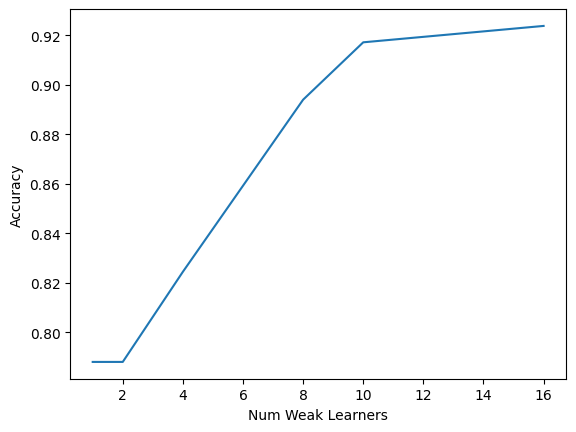

In [11]:
plot.plot(scores.keys(),scores.values())
plot.xlabel("Num Weak Learners")
plot.ylabel("Accuracy")

In [12]:
n_estimators = [1,2,4,8,10,16,32]
scores ={}

for num in n_estimators:
    clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=num,learning_rate=1.5,algorithm=('SAMME'))
    clf = clf.fit(X_train,y_train)
    scores[num]=  clf.score(X_test,y_test)
display(scores)

{1: 0.890728476821192,
 2: 0.890728476821192,
 4: 0.9172185430463576,
 8: 0.956953642384106,
 10: 0.9437086092715232,
 16: 0.9701986754966887,
 32: 0.9701986754966887}